In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
df=pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

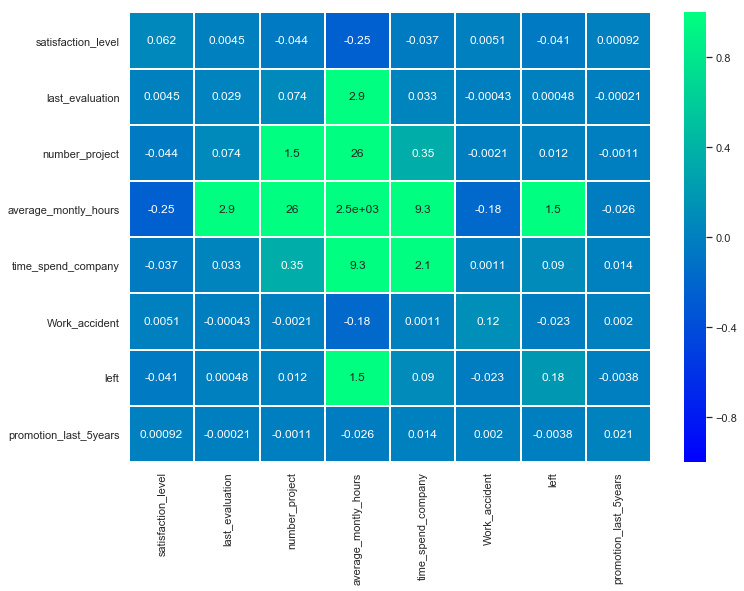

In [5]:
sns.heatmap(data=df.cov(),vmin=-1.,vmax=1.,annot=True,cmap='winter',linewidths=1)

In [6]:
dicl=[]
for c in dict([(k,v) for k,v in zip(df.dtypes.index,df.dtypes) if v==np.dtype("O")]).keys():
    dicl.append((c,dict([(e,i) for i,e in enumerate(set(df[c]))])))
    df[c]=df[c].map(dicl[-1][1])
dc=dict(dicl)

In [7]:
dc

{'sales': {'accounting': 0,
  'technical': 1,
  'IT': 2,
  'hr': 3,
  'sales': 4,
  'marketing': 5,
  'RandD': 6,
  'product_mng': 7,
  'support': 8,
  'management': 9},
 'salary': {'high': 0, 'medium': 1, 'low': 2}}

In [8]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,4,2
1,0.80,0.86,5,262,6,0,1,0,4,1
2,0.11,0.88,7,272,4,0,1,0,4,1
3,0.72,0.87,5,223,5,0,1,0,4,2
4,0.37,0.52,2,159,3,0,1,0,4,2


# Data Preprocessing

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
X=df.drop(columns=['left'])
y=df.left

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

C:\Users\USER\Anaconda\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\USER\Anaconda\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\USER\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


# Model with Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [28]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\USER\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
tr_pred=logreg.predict(X_train)
te_pred=logreg.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix,classification_report
print("For training:\n",classification_report(y_train,tr_pred))
print("Accuracy:",(y_train==tr_pred).mean()*100,'%')
print("For testing:\n",classification_report(y_test,te_pred))
print("Accuracy:",(y_test==te_pred).mean()*100,'%')

For training:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      7659
           1       0.61      0.37      0.46      2390

   micro avg       0.79      0.79      0.79     10049
   macro avg       0.72      0.65      0.67     10049
weighted avg       0.77      0.79      0.78     10049

Accuracy: 79.47059408896408 %
For testing:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      3769
           1       0.59      0.34      0.43      1181

   micro avg       0.79      0.79      0.79      4950
   macro avg       0.70      0.63      0.65      4950
weighted avg       0.76      0.79      0.76      4950

Accuracy: 78.54545454545455 %


Training:


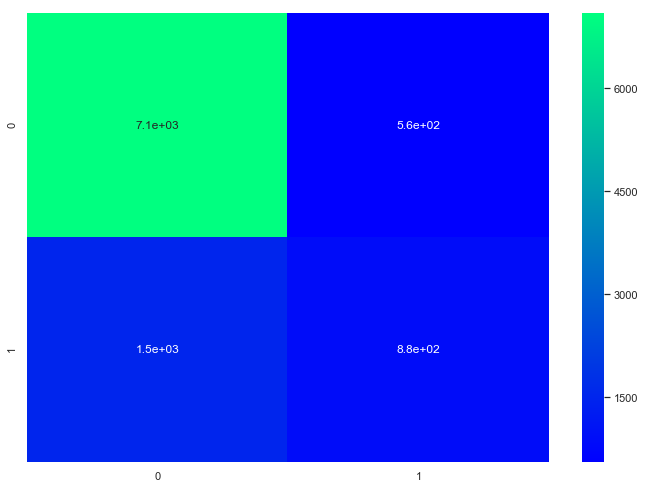

Testing


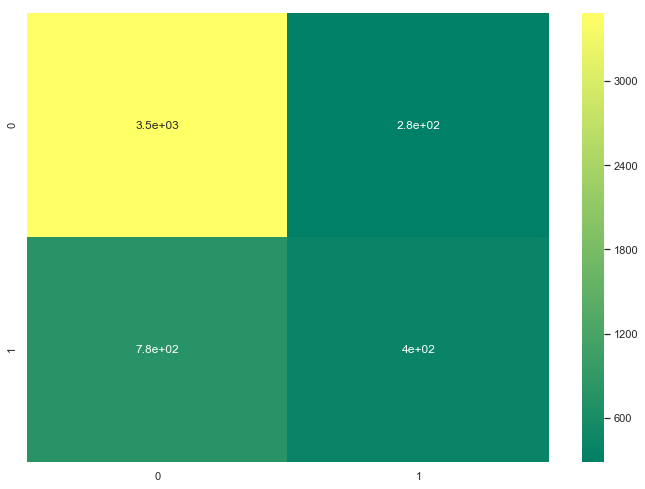

In [17]:
print("Training:")
sns.heatmap(confusion_matrix(y_train,tr_pred),annot=True,cmap='winter')
plt.show()
print("Testing")
sns.heatmap(confusion_matrix(y_test,te_pred),annot=True,cmap='summer')
plt.show()

# Model with ANN

In [18]:
from tensorflow import keras

In [19]:
model=keras.Sequential()
model.add(keras.layers.Dense(9,'relu',input_shape=(9,)))
model.add(keras.layers.Dense(9,'relu'))
model.add(keras.layers.Dense(9,'relu'))
model.add(keras.layers.Dense(9,'relu'))
model.add(keras.layers.Dense(9,'relu'))
model.add(keras.layers.Dense(1,'sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#model.summary()

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
history=model.fit(X_train,y_train,batch_size=32,epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
10049/10049 [==============================] - 2s 200us/sample - loss: 0.4461 - acc: 0.7754
Epoch 2/100
10049/10049 [==============================] - 1s 138us/sample - loss: 0.2230 - acc: 0.9323
Epoch 3/100
10049/10049 [==============================] - 1s 140us/sample - loss: 0.1604 - acc: 0.9502
Epoch 4/100
10049/10049 [==============================] - 1s 139us/sample - loss: 0.1466 - acc: 0.9567
Epoch 5/100
10049/10049 [==============================] - 1s 141us/sample - loss: 0.1396 - acc: 0.9578
Epoch 6/100
10049/10049 [==============================] - 1s 146us/sample - loss: 0.1351 - acc: 0.9591
Epoch 7/100
10049/10049 [==============================] - 2s 173us/sample - loss: 0.1306 - acc: 0.9601
Epoch 8/100
10049/10049 [==============================] - 1s 139us/sample - loss: 0.1294 - acc: 0.9617
Epoch 9/100
10049/10049 [==============================] - 1s 139us/sample - loss: 0.1251 - acc: 0.9624
Epoch 10/100
100

10049/10049 [==============================] - 1s 145us/sample - loss: 0.0929 - acc: 0.9730
Epoch 77/100
10049/10049 [==============================] - 1s 141us/sample - loss: 0.0918 - acc: 0.9725
Epoch 78/100
10049/10049 [==============================] - 1s 138us/sample - loss: 0.0921 - acc: 0.9723
Epoch 79/100
10049/10049 [==============================] - 1s 139us/sample - loss: 0.0920 - acc: 0.9728
Epoch 80/100
10049/10049 [==============================] - 1s 141us/sample - loss: 0.0915 - acc: 0.9728
Epoch 81/100
10049/10049 [==============================] - 1s 144us/sample - loss: 0.0911 - acc: 0.9724
Epoch 82/100
10049/10049 [==============================] - 1s 144us/sample - loss: 0.0918 - acc: 0.9728
Epoch 83/100
10049/10049 [==============================] - 1s 141us/sample - loss: 0.0913 - acc: 0.9725
Epoch 84/100
10049/10049 [==============================] - 1s 144us/sample - loss: 0.0909 - acc: 0.9721
Epoch 85/100
10049/10049 [==============================] - 1s 146us

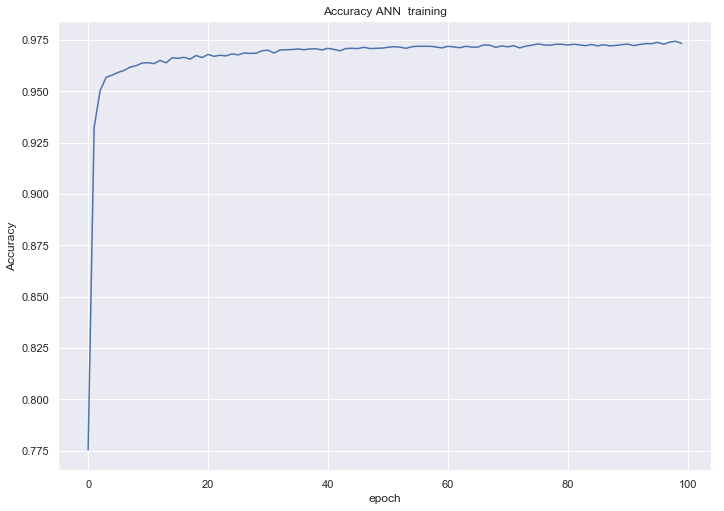

In [27]:
plt.plot(history.history['acc'])
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy ANN  training")
plt.show()

In [21]:
tr_pred=model.predict_classes(X_train).flatten()
te_pred=model.predict_classes(X_test).flatten()

In [22]:
from sklearn.metrics import confusion_matrix,classification_report
print("For training:\n",classification_report(y_train,tr_pred))
print("Accuracy:",(y_train==tr_pred).mean()*100,'%')
print("For testing:\n",classification_report(y_test,te_pred))
print("Accuracy:",(y_test==te_pred).mean()*100,'%')

For training:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      7659
           1       0.97      0.93      0.95      2390

   micro avg       0.98      0.98      0.98     10049
   macro avg       0.98      0.96      0.97     10049
weighted avg       0.98      0.98      0.98     10049

Accuracy: 97.64155637376854 %
For testing:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      3769
           1       0.95      0.89      0.92      1181

   micro avg       0.96      0.96      0.96      4950
   macro avg       0.96      0.94      0.95      4950
weighted avg       0.96      0.96      0.96      4950

Accuracy: 96.28282828282828 %


Training:


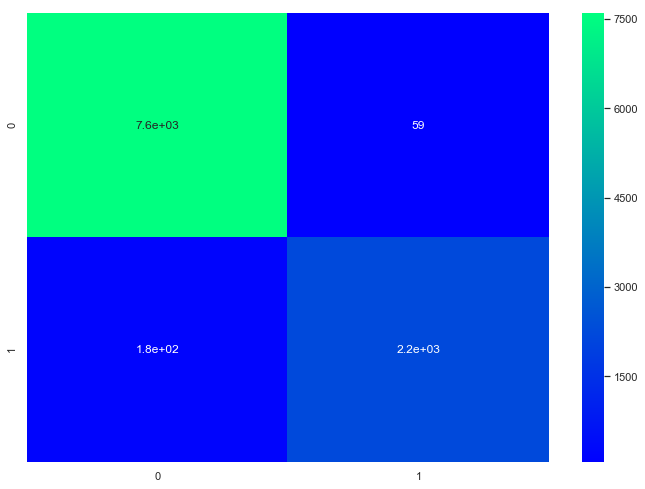

Testing


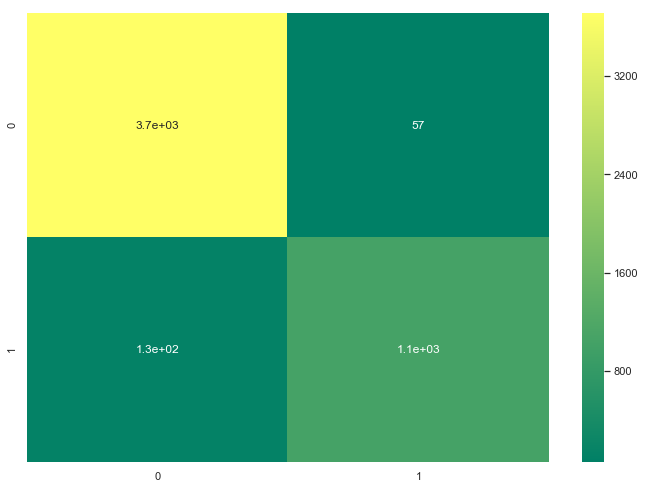

In [23]:
print("Training:")
sns.heatmap(confusion_matrix(y_train,tr_pred),annot=True,cmap='winter')
plt.show()
print("Testing")
sns.heatmap(confusion_matrix(y_test,te_pred),annot=True,cmap='summer')
plt.show()

In [24]:
#NICE